<a href="https://colab.research.google.com/github/Priyankaswain17/Credit-Card-Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import require library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
import os
os.chdir('/content/drive/My Drive/Capstone Project/')

## **Understanding Data**

In [ ]:
# Load Fraud Train and Fraud Test data sets

Train_df = pd.read_csv("fraudTrain.csv")
Test_df = pd.read_csv("fraudTest.csv")

In [ ]:
fraudTrain_df = Train_df.copy()
fraudTest_df = Test_df.copy()

In [ ]:
# Display first five rows of Fraud Train data sets

fraudTrain_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# Display first five rows of Fraud Test data sets

fraudTest_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# drop Unnamed column from data sets

fraudTrain_df.drop(['Unnamed: 0'], axis=1, inplace=True)
fraudTest_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
fraudTrain_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
fraudTest_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [ ]:
# Shape of the dataframes

print("fraudTrain", fraudTrain_df.shape)
print("fraudTest", fraudTest_df.shape)

fraudTrain (1296675, 22)
fraudTest (555719, 22)


In [ ]:
# Check summary of the fraudTrain_df DataFrame

fraudTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
# Check summary of the fraudTest_df DataFrame

fraudTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
# Converting trans_date_trans_time and dob columns to datetime format

fraudTrain_df['trans_date_trans_time'] = pd.to_datetime(fraudTrain_df['trans_date_trans_time'])
fraudTrain_df['trans_date'] = fraudTrain_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraudTrain_df['trans_date'] = pd.to_datetime(fraudTrain_df['trans_date'])
fraudTrain_df['dob'] = pd.to_datetime(fraudTrain_df['dob'])

fraudTest_df['trans_date_trans_time'] = pd.to_datetime(fraudTest_df['trans_date_trans_time'])
fraudTest_df['trans_date'] = fraudTest_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraudTest_df['trans_date'] = pd.to_datetime(fraudTest_df['trans_date'])
fraudTest_df['dob'] = pd.to_datetime(fraudTest_df['dob'])

In [ ]:
fraudTrain_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01


In [ ]:
fraudTest_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21


In [ ]:
# Extracting day of the week and month

fraudTrain_df['day_of_week'] = fraudTrain_df['trans_date'].dt.day_name()
fraudTrain_df['trans_month'] = fraudTrain_df['trans_date'].dt.month

fraudTest_df['day_of_week'] = fraudTest_df['trans_date'].dt.day_name()
fraudTest_df['trans_month'] = fraudTest_df['trans_date'].dt.month


In [ ]:
# Drop trans_date_trans_time columns from data sets

fraudTrain_df.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraudTest_df.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [ ]:
# Check statistical summary of the fraudTrain_df DataFrame

fraudTrain_df.describe()

,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,2019-10-02 23:29:11.362831872,6.142150e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,2019-01-01 00:00:00,1.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2019-06-03 00:00:00,3.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,2019-10-03 00:00:00,6.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,2020-01-28 00:00:00,9.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2020-06-21 00:00:00,1.200000e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,NaN,3.417703e+00


In [ ]:
# Check statistical summary of the fraudTest_df DataFrame

fraudTest_df.describe()

,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_month
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,1.380679e+09,38.542798,-90.231380,0.003860,2020-10-01 12:35:52.929807872,9.508536
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,1.371817e+09,19.027422,-166.671575,0.000000,2020-06-21 00:00:00,6.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,1.376029e+09,34.755302,-96.905129,0.000000,2020-08-09 00:00:00,8.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,1.380762e+09,39.376593,-87.445204,0.000000,2020-10-03 00:00:00,10.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,1.385867e+09,41.954163,-80.264637,0.000000,2020-12-01 00:00:00,12.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,1.388534e+09,66.679297,-66.952026,1.000000,2020-12-31 00:00:00,12.000000
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,NaN,5.201104e+06,5.095829,13.733071,0.062008,NaN,1.978205


In [ ]:
# Check missing values in DataFrames

train_missing = fraudTrain_df.isnull().sum()
test_missing = fraudTest_df.isnull().sum()

print("Missing values in fraudTrain_df:\n", train_missing)
print("\n\nMissing values in fraudTest_df:\n", test_missing)

Missing values in fraudTrain_df:
 cc_num         0
merchant       0
category       0
amt            0
first          0
last           0
gender         0
street         0
city           0
state          0
zip            0
lat            0
long           0
city_pop       0
job            0
dob            0
trans_num      0
unix_time      0
merch_lat      0
merch_long     0
is_fraud       0
trans_date     0
day_of_week    0
trans_month    0
dtype: int64


Missing values in fraudTest_df:
 cc_num         0
merchant       0
category       0
amt            0
first          0
last           0
gender         0
street         0
city           0
state          0
zip            0
lat            0
long           0
city_pop       0
job            0
dob            0
trans_num      0
unix_time      0
merch_lat      0
merch_long     0
is_fraud       0
trans_date     0
day_of_week    0
trans_month    0
dtype: int64


`As we can see there are no missing values in both datasets.`

In [ ]:
# Check duplicate values in DataFrames

train_duplicates = fraudTrain_df.duplicated().sum()
test_duplicates = fraudTest_df.duplicated().sum()

print("Duplicate values in fraudTrain_df:", train_duplicates)
print("Duplicate values in fraudTest_df:", test_duplicates)


Duplicate values in fraudTrain_df: 0
Duplicate values in fraudTest_df: 0


`As we can see there are no duplicate values in both datasets.`

In [ ]:
# Drop unnecessary columns from DataFrames

fraudTrain_df.drop(['cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)
fraudTest_df.drop(['cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)

In [ ]:
fraudTrain_df.head(3)

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,day_of_week,trans_month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,Tuesday,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,Tuesday,1
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,Tuesday,1


In [ ]:
# Check imbalance in the target variable

IsFraudTrain = fraudTrain_df[['is_fraud', 'trans_date']].groupby('is_fraud').count().reset_index()
IsFraudTrain.columns = ['Fraud Train', 'Count']
IsFraudTrain['Percentage'] = (IsFraudTrain['Count'] / IsFraudTrain['Count'].sum())*100
print(IsFraudTrain)

IsFraudTest = fraudTest_df[['is_fraud', 'trans_date']].groupby('is_fraud').count().reset_index()
IsFraudTest.columns = ['Fraud Test', 'Count']
IsFraudTest['Percentage'] = (IsFraudTest['Count'] / IsFraudTest['Count'].sum())*100
print("\n",IsFraudTest)

   Fraud Train    Count  Percentage
0            0  1289169   99.421135
1            1     7506    0.578865

    Fraud Test   Count  Percentage
0           0  553574   99.614014
1           1    2145    0.385986


`As we can see both datasets are highly imbalanced.`

In [ ]:
# Create age variable from transaction dates and DOB

fraudTrain_df['age'] = (fraudTrain_df['trans_date'] - fraudTrain_df['dob']).dt.days // 365
fraudTest_df['age'] = (fraudTest_df['trans_date'] - fraudTest_df['dob']).dt.days // 365

print(fraudTrain_df['age'].head())
print(fraudTest_df['age'].head())

0    30
1    40
2    56
3    52
4    32
Name: age, dtype: int64
0    52
1    30
2    49
3    32
4    65
Name: age, dtype: int64


In [ ]:
fraudTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   merchant     1296675 non-null  object        
 1   category     1296675 non-null  object        
 2   amt          1296675 non-null  float64       
 3   gender       1296675 non-null  object        
 4   city         1296675 non-null  object        
 5   state        1296675 non-null  object        
 6   lat          1296675 non-null  float64       
 7   long         1296675 non-null  float64       
 8   city_pop     1296675 non-null  int64         
 9   job          1296675 non-null  object        
 10  dob          1296675 non-null  datetime64[ns]
 11  merch_lat    1296675 non-null  float64       
 12  merch_long   1296675 non-null  float64       
 13  is_fraud     1296675 non-null  int64         
 14  trans_date   1296675 non-null  datetime64[ns]
 15  day_of_week  12

In [ ]:
fraudTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   merchant     555719 non-null  object        
 1   category     555719 non-null  object        
 2   amt          555719 non-null  float64       
 3   gender       555719 non-null  object        
 4   city         555719 non-null  object        
 5   state        555719 non-null  object        
 6   lat          555719 non-null  float64       
 7   long         555719 non-null  float64       
 8   city_pop     555719 non-null  int64         
 9   job          555719 non-null  object        
 10  dob          555719 non-null  datetime64[ns]
 11  merch_lat    555719 non-null  float64       
 12  merch_long   555719 non-null  float64       
 13  is_fraud     555719 non-null  int64         
 14  trans_date   555719 non-null  datetime64[ns]
 15  day_of_week  555719 non-null  obje

In [ ]:
# Check number of unique values in each features of Train Data Set

fraudTrain_df.nunique()

,0
merchant,693
category,14
amt,52928
gender,2
city,894
state,51
lat,968
long,969
city_pop,879
job,494


In [ ]:
# Check number of unique values in each features of Test Data Set

fraudTest_df.nunique()

,0
merchant,693
category,14
amt,37256
gender,2
city,849
state,50
lat,910
long,910
city_pop,835
job,478


## **Exploratory data analytics (EDA)**

#### **Univariate Analysis of Numerical Features**

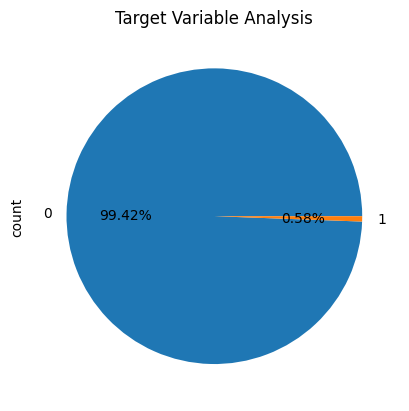

In [ ]:
# Pie plot to understand the distribution of target 'is_fraud' variable

fraudTrain_df['is_fraud'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Target Variable Analysis')
plt.show()

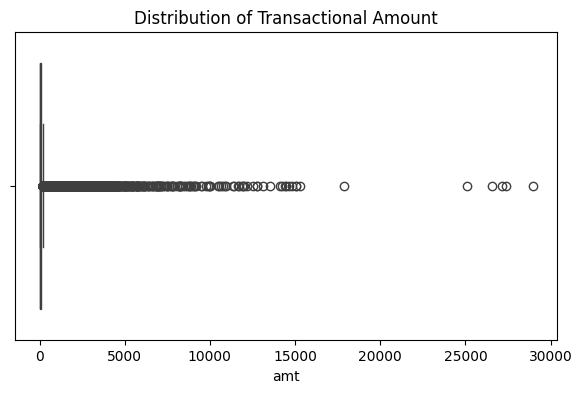

In [ ]:
# Box plot to understand the distribution of amount
plt.figure(figsize=(7, 4))
sns.boxplot(x=fraudTrain_df['amt'])
plt.title('Distribution of Transactional Amount')
plt.show()

`This box plot indicates that while most transaction amounts are small, there is a small number of very large transactions that stand out as outliers. These outliers could potentially represent fraudulent activities or high-value legitimate transactions that are uncommon.`

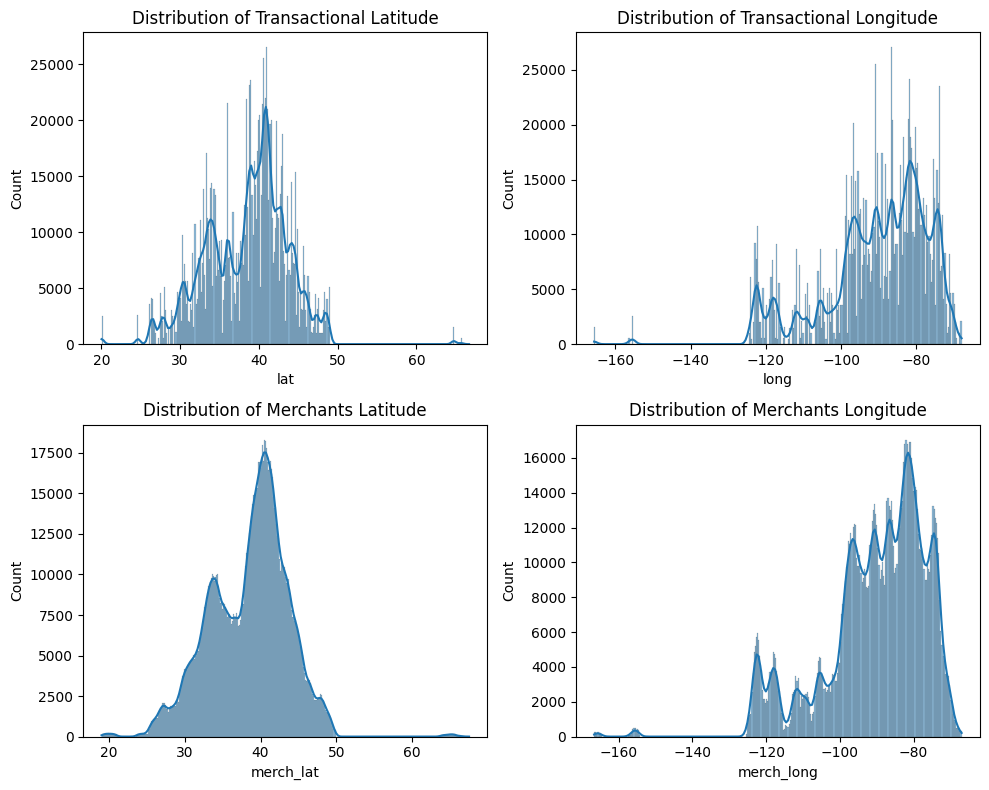

In [ ]:
# Histograms plots to understand the distribution of Transaction's and Merchant's Latitude & Longitude

plt.figure(figsize=(10, 8))

# Plot for 'lat'
plt.subplot(2, 2, 1)
sns.histplot(fraudTrain_df['lat'], kde=True)
plt.title('Distribution of Transactional Latitude')

# Plot for 'long'
plt.subplot(2, 2, 2)
sns.histplot(fraudTrain_df['long'], kde=True)
plt.title('Distribution of Transactional Longitude')

# Plot for 'merch_lat'
plt.subplot(2, 2, 3)
sns.histplot(fraudTrain_df['merch_lat'], kde=True)
plt.title('Distribution of Merchants Latitude')

# Plot for 'long'
plt.subplot(2, 2, 4)
sns.histplot(fraudTrain_df['merch_long'], kde=True)
plt.title('Distribution of Merchants Longitude')

plt.tight_layout()
plt.show()

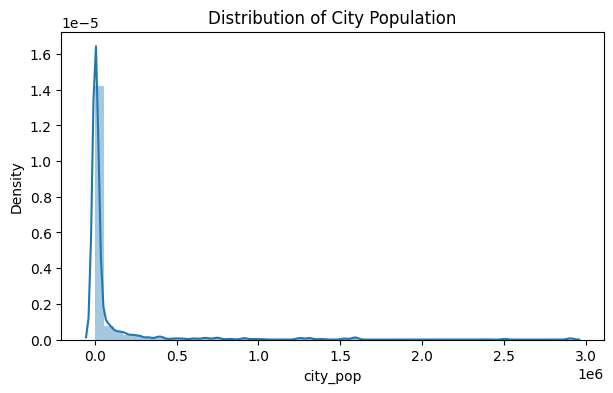

In [ ]:
# Dist plot to understand the distribution of city population

plt.figure(figsize=(7, 4))
sns.distplot(fraudTrain_df['city_pop'])
plt.title('Distribution of City Population')
plt.show()

`This distribution shows that most cities have small populations, which could also imply fewer transactions per city for smaller populations, and possibly a different fraud risk profile compared to larger cities.`

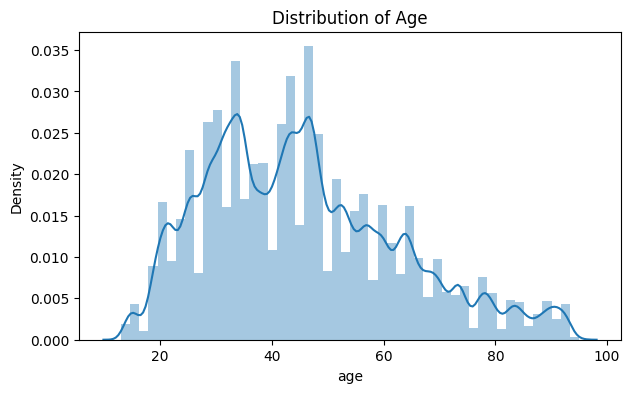

In [ ]:
# Dist plot to understand the distribution of Age

plt.figure(figsize=(7, 4))
sns.distplot(fraudTrain_df['age'])
plt.title('Distribution of Age')
plt.show()

`The distribution of age is right-skewed, with the majority of individuals in the dataset being younger (20-50 years old), and fewer individuals in older age groups.`

#### **Univariate Analysis of Categorical Features**

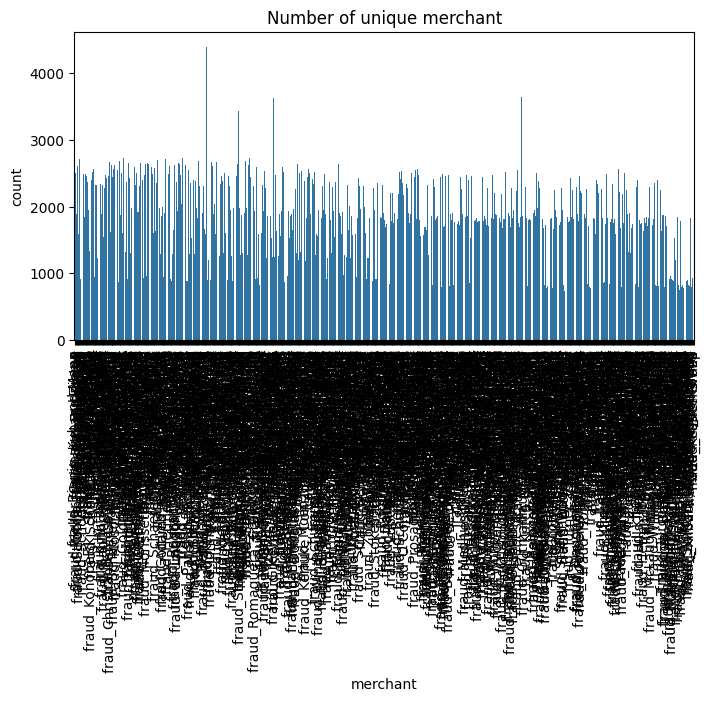

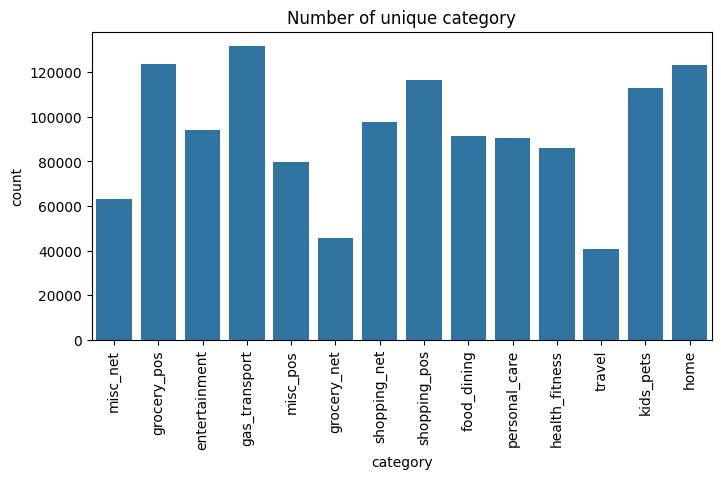

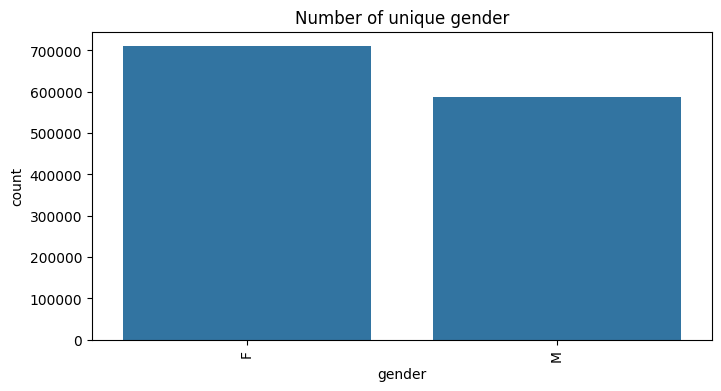

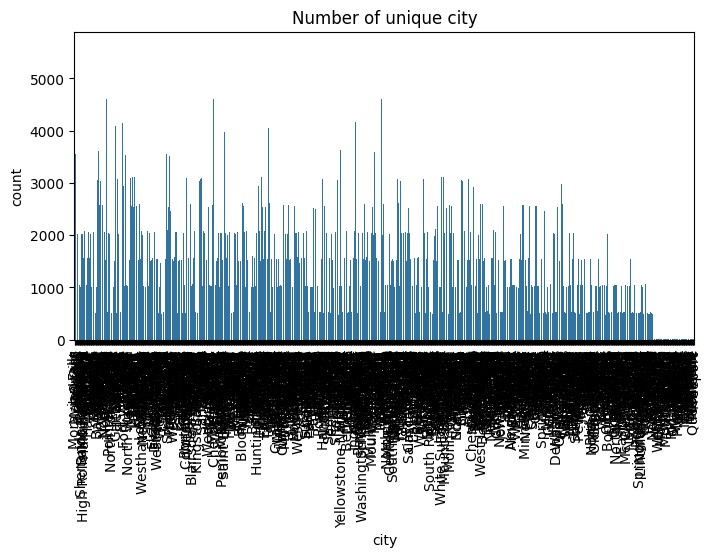

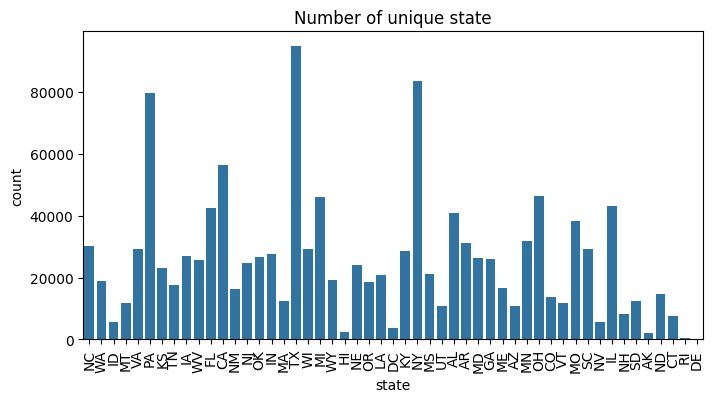

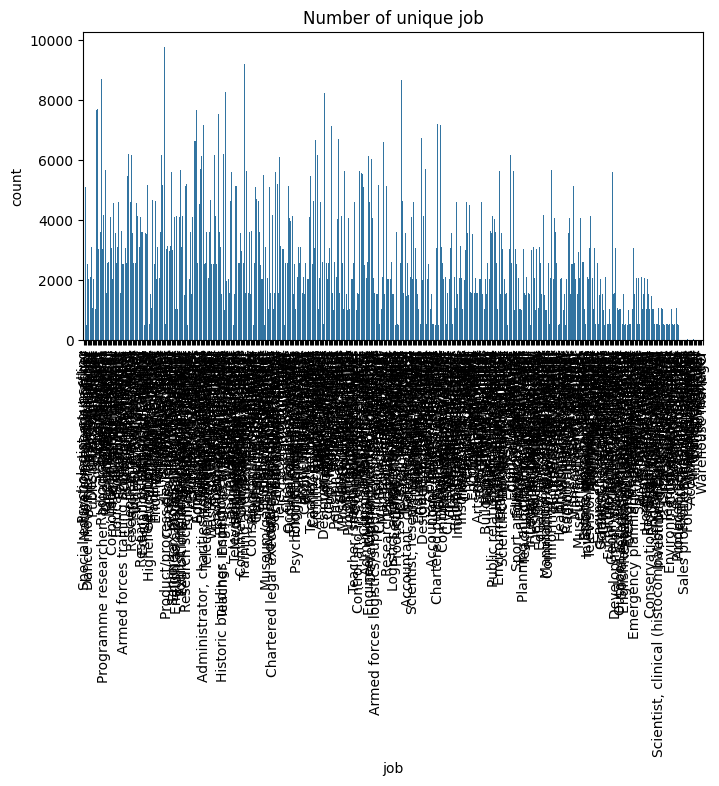

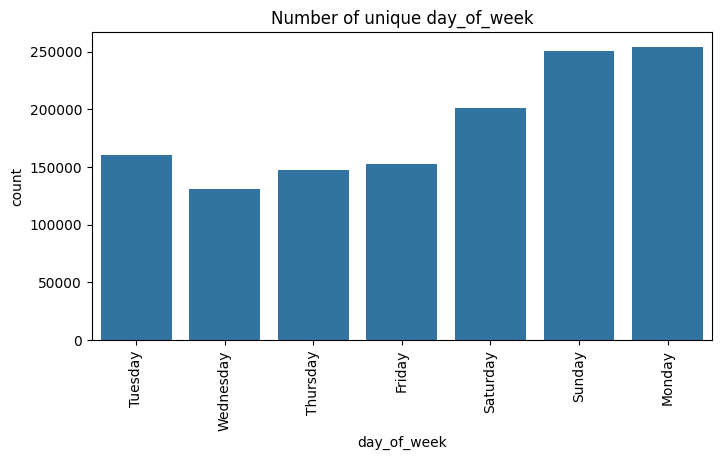

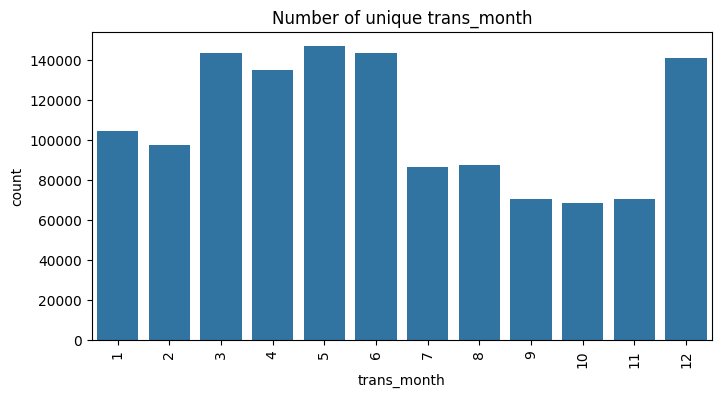

In [ ]:
# Plot bar charts to see the frequency of each category

cate_var = ['merchant', 'category', 'gender', 'city', 'state', 'job', 'day_of_week', 'trans_month']

for var in cate_var:
    plt.figure(figsize=(8, 4))
    # fraudTrain_df[var].value_counts().plot(kind='bar')
    sns.countplot(x=fraudTrain_df[var])
    plt.xticks(rotation=90)
    plt.title(f'Number of unique {var}')

#### **Bivariate Analysis**

In [ ]:
fraudTrain_df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,day_of_week,trans_month,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,Tuesday,1,30
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,Tuesday,1,40
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,Tuesday,1,56
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,Tuesday,1,52
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,Tuesday,1,32


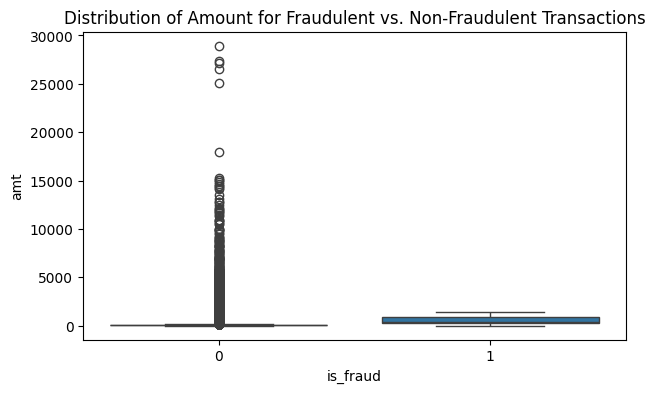

In [ ]:
# Boxplot to compare the distribution of amt for fraudulent vs. non-fraudulent transactions

plt.figure(figsize=(7, 4))
sns.boxplot(x='is_fraud', y='amt', data=fraudTrain_df)
plt.title('Distribution of Amount for Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

`We can see fraudulent transactions generally have lower transaction amounts, while non-fraudulent transactions show a wider range and more frequent high-value outliers.`

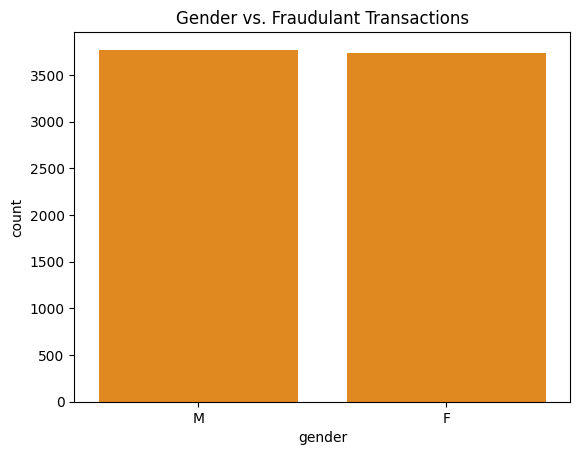

In [ ]:
# Bar plot for Gender vs. Fraudulant Transactions

sns.countplot(x = fraudTrain_df[fraudTrain_df['is_fraud']==1].gender, color = 'darkorange')
plt.title('Gender vs. Fraudulant Transactions')
plt.show()

`The distribution of fraudulent transactions is roughly equal between males and females, indicating no significant gender difference in the occurrence of fraudulent transactions.`

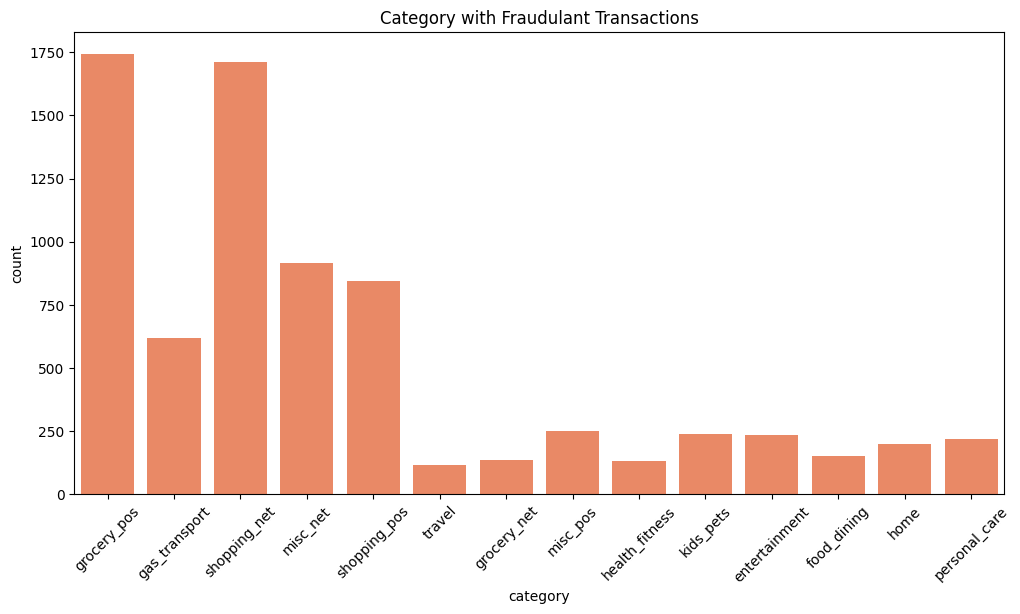

In [ ]:
# Bar plot for Category with Fraudulant Transactions

plt.figure(figsize=(12, 6))
sns.countplot(x = fraudTrain_df[fraudTrain_df['is_fraud']==1].category, color = 'coral')
plt.title('Category with Fraudulant Transactions')
plt.xticks(rotation=45)
plt.show()

`Fraudulent transactions are most common in the grocery_pos and shopping_net categories, each with a count exceeding 1,700 transactions.`

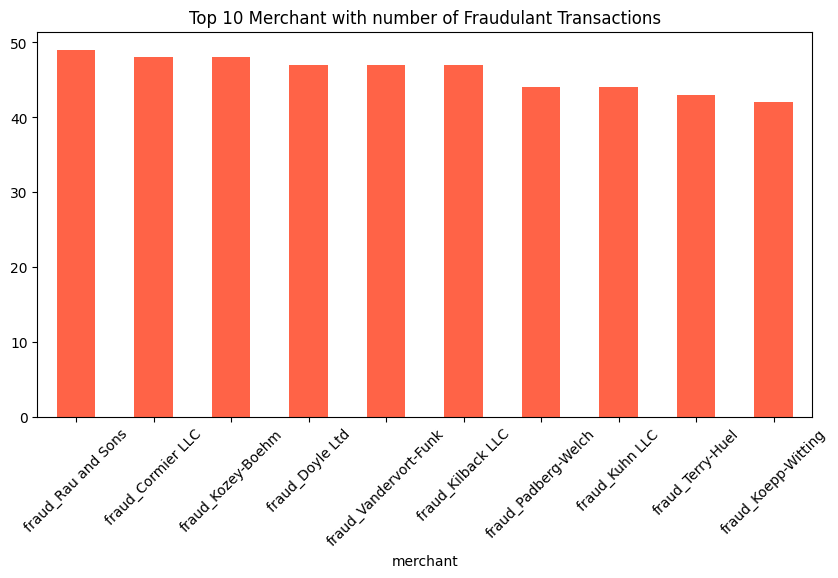

In [ ]:
# Bar plot for Merchant with Fraudulant Transactions

plt.figure(figsize=(10, 5))
fraudTrain_df[fraudTrain_df['is_fraud']==1]['merchant'].value_counts().head(10).plot(kind='bar', color = 'tomato')
plt.title('Top 10 Merchant with number of Fraudulant Transactions')
plt.xticks(rotation=45)
plt.show()

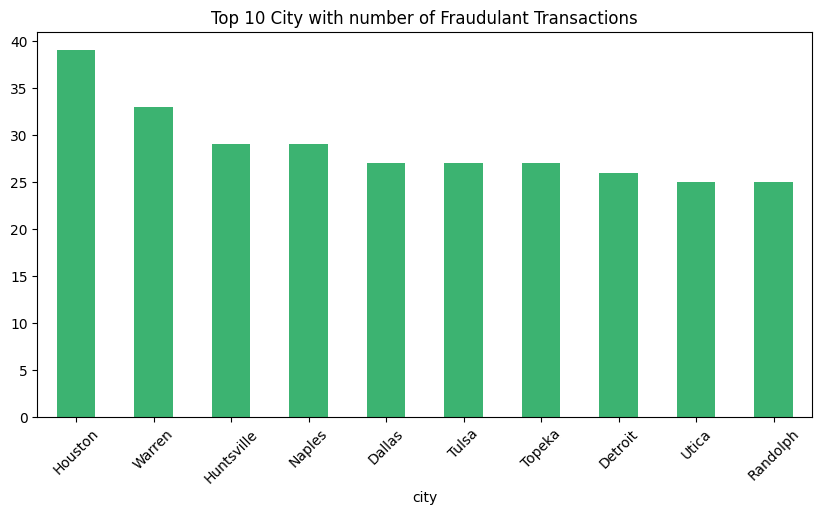

In [ ]:
# Bar plot for city with Fraudulant Transactions

plt.figure(figsize=(10, 5))
fraudTrain_df[fraudTrain_df['is_fraud']==1]['city'].value_counts().head(10).plot(kind='bar', color = 'mediumseagreen')
plt.title('Top 10 City with number of Fraudulant Transactions')
plt.xticks(rotation=45)
plt.show()

`Houston leads in the number of fraudulent transactions, followed by Warren and Huntsville, indicating higher fraud activity in these cities.`

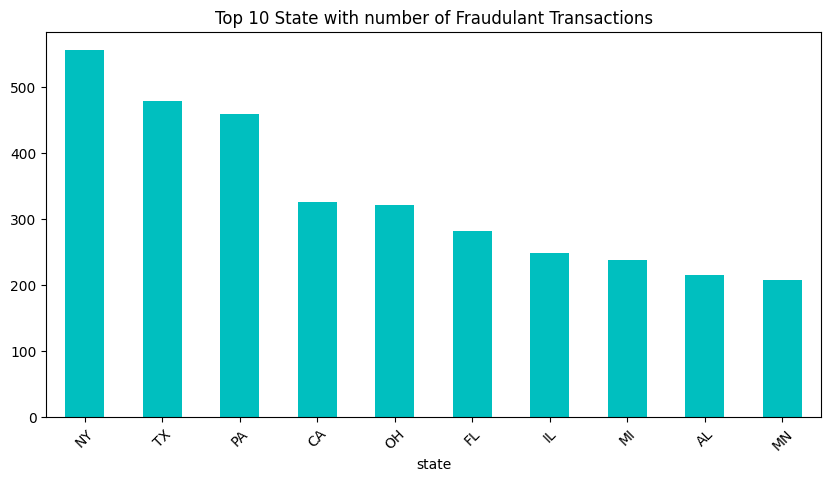

In [ ]:
# Bar plot for state with Fraudulant Transactions

plt.figure(figsize=(10, 5))
fraudTrain_df[fraudTrain_df['is_fraud']==1]['state'].value_counts().head(10).plot(kind='bar', color = 'c')
plt.title('Top 10 State with number of Fraudulant Transactions')
plt.xticks(rotation=45)
plt.show()

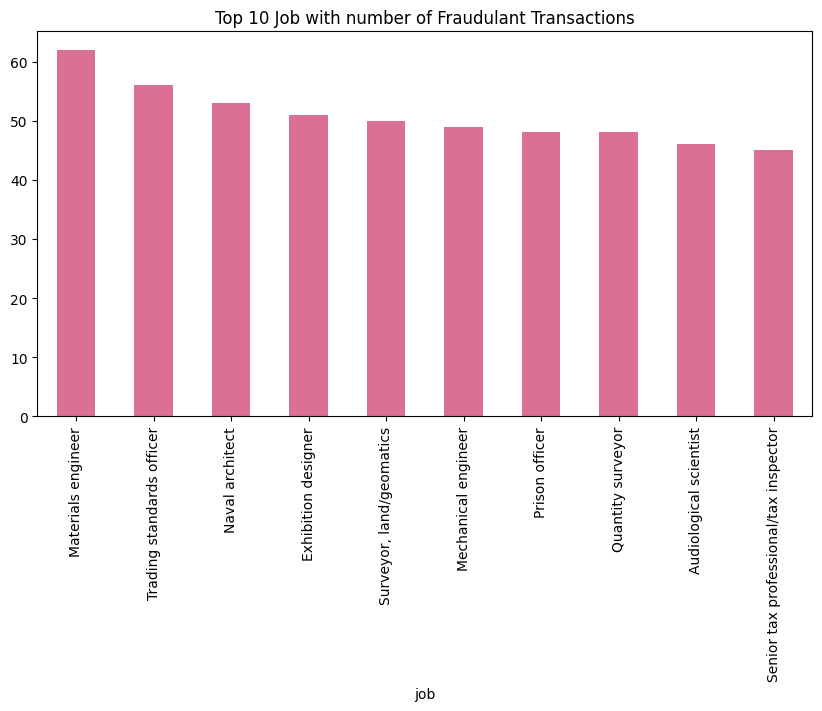

In [ ]:
# Bar plot for Job with Fraudulant Transactions

plt.figure(figsize=(10, 5))
fraudTrain_df[fraudTrain_df['is_fraud']==1]['job'].value_counts().head(10).plot(kind='bar', color = 'palevioletred')
plt.title('Top 10 Job with number of Fraudulant Transactions')
plt.xticks(rotation=90)
plt.show()

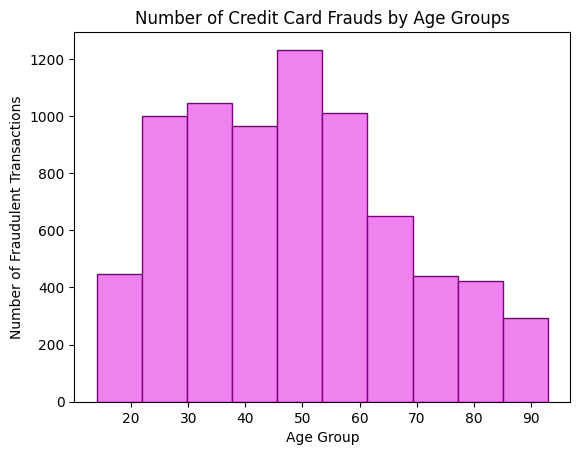

In [ ]:
# Bar plot for Age Group vs. Fraudulant Transactions

fraud = fraudTrain_df[fraudTrain_df['is_fraud']==1]
plt.hist(fraud['age'], bins=10, color='violet', edgecolor = "purple")
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Credit Card Frauds by Age Groups')
plt.show()


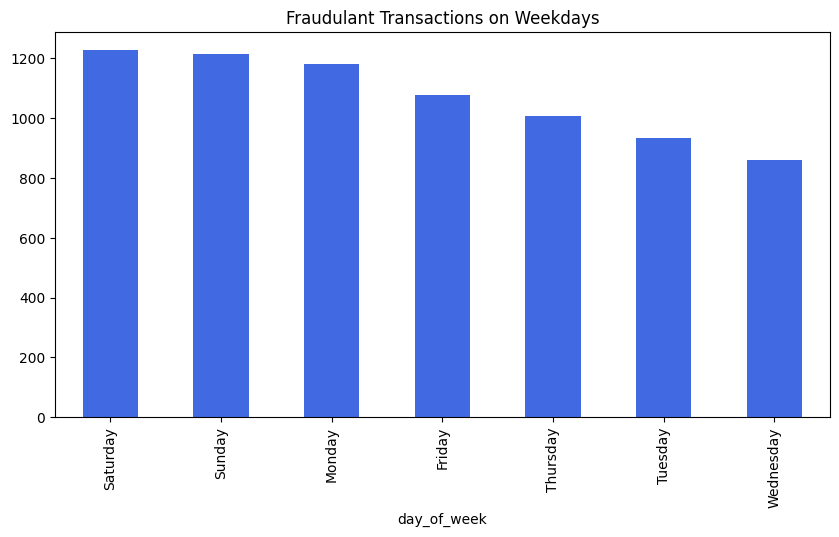

In [ ]:
# Bar plot for Fraudulant Transactions on weekdays

plt.figure(figsize=(10, 5))
fraudTrain_df[fraudTrain_df['is_fraud']==1]['day_of_week'].value_counts().plot(kind='bar', color = 'royalblue')
plt.title('Fraudulant Transactions on Weekdays')
plt.show()

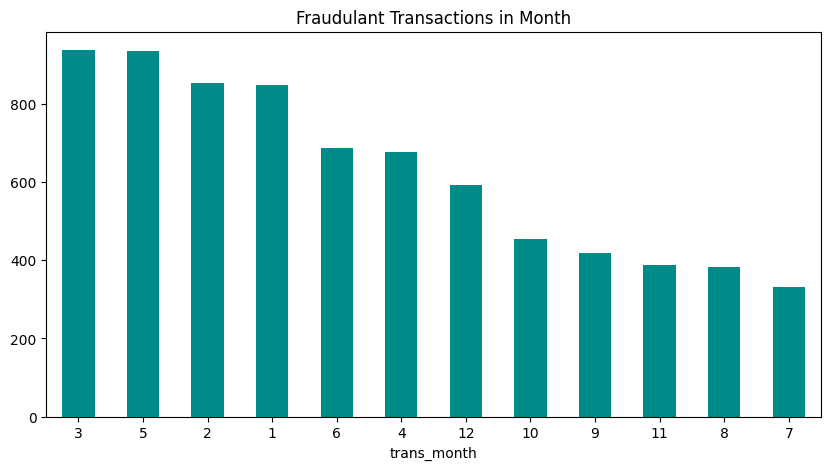

In [ ]:
# Bar plot for Fraudulant Transactions in Month

plt.figure(figsize=(10, 5))
fraudTrain_df[fraudTrain_df['is_fraud']==1]['trans_month'].value_counts().plot(kind='bar', color = 'darkcyan')
plt.title('Fraudulant Transactions in Month')
plt.xticks(rotation=0)
plt.show()

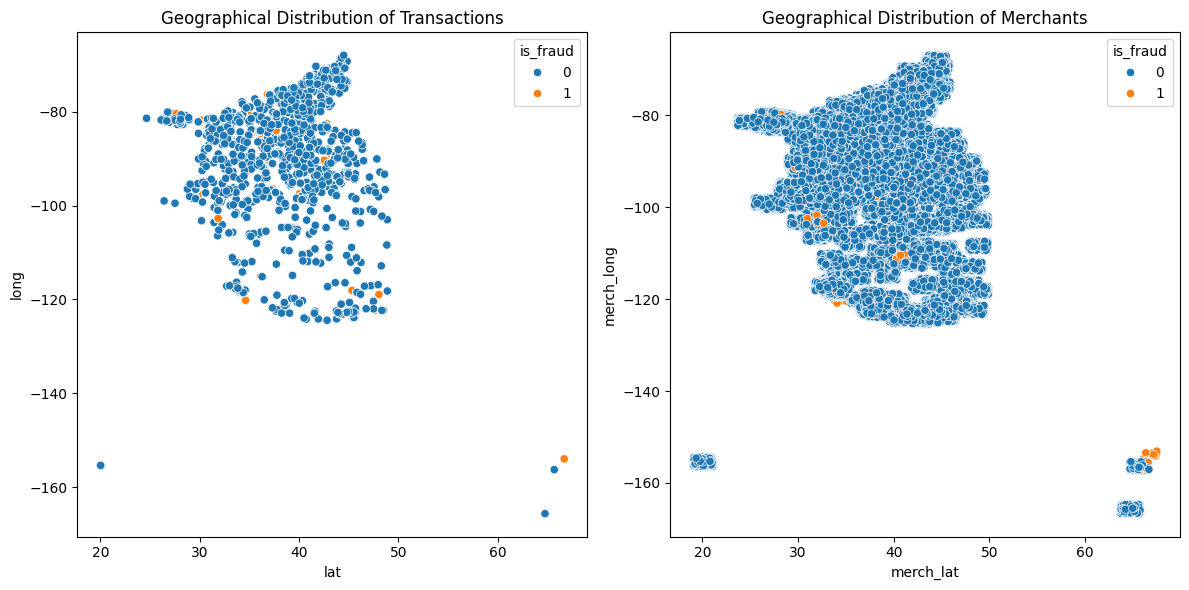

In [ ]:
# Scatter plots of lat and long to see the distribution of transactions geographically.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='lat', y='long', hue='is_fraud', data=fraudTrain_df)
plt.title('Geographical Distribution of Transactions')

plt.subplot(1, 2, 2)
sns.scatterplot(x='merch_lat', y='merch_long', hue='is_fraud', data=fraudTrain_df)
plt.title('Geographical Distribution of Merchants')

plt.tight_layout()
plt.show()

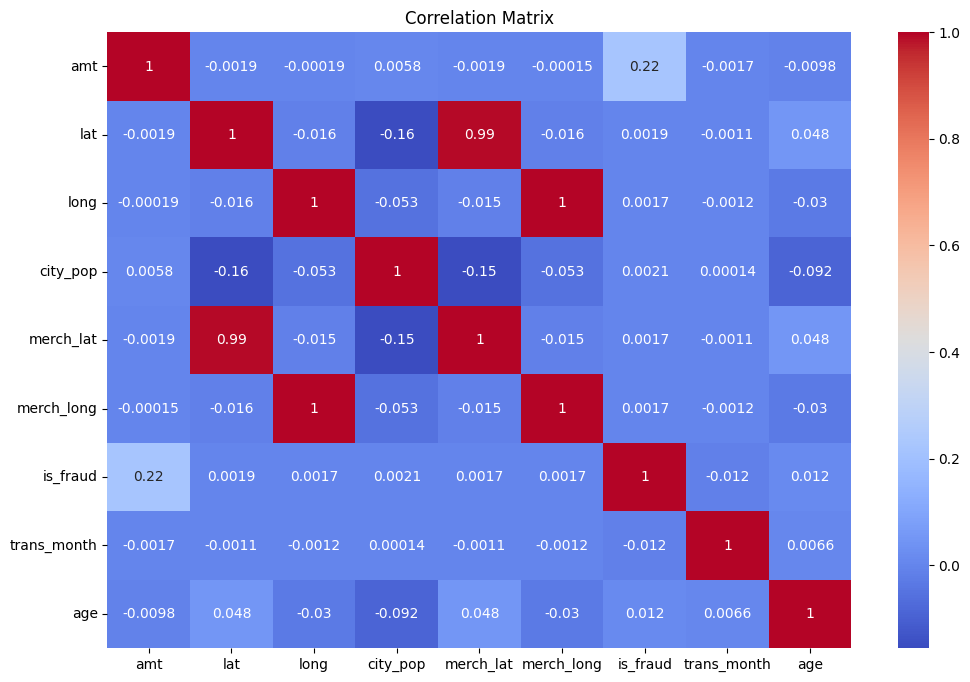

In [ ]:
# Correlation matrix to see relationships between numerical features

numeric_df = fraudTrain_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
fraudTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   merchant     1296675 non-null  object        
 1   category     1296675 non-null  object        
 2   amt          1296675 non-null  float64       
 3   gender       1296675 non-null  object        
 4   city         1296675 non-null  object        
 5   state        1296675 non-null  object        
 6   lat          1296675 non-null  float64       
 7   long         1296675 non-null  float64       
 8   city_pop     1296675 non-null  int64         
 9   job          1296675 non-null  object        
 10  dob          1296675 non-null  datetime64[ns]
 11  merch_lat    1296675 non-null  float64       
 12  merch_long   1296675 non-null  float64       
 13  is_fraud     1296675 non-null  int64         
 14  trans_date   1296675 non-null  datetime64[ns]
 15  day_of_week  12

In [ ]:
# The distance between the transaction location (lat, long) and the merchant location (merch_lat, merch_long)

from geopy.distance import geodesic

fraudTrain_df['distance'] = fraudTrain_df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)
fraudTest_df['distance'] = fraudTest_df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)


In [ ]:
fraudTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   merchant     1296675 non-null  object        
 1   category     1296675 non-null  object        
 2   amt          1296675 non-null  float64       
 3   gender       1296675 non-null  object        
 4   city         1296675 non-null  object        
 5   state        1296675 non-null  object        
 6   lat          1296675 non-null  float64       
 7   long         1296675 non-null  float64       
 8   city_pop     1296675 non-null  int64         
 9   job          1296675 non-null  object        
 10  dob          1296675 non-null  datetime64[ns]
 11  merch_lat    1296675 non-null  float64       
 12  merch_long   1296675 non-null  float64       
 13  is_fraud     1296675 non-null  int64         
 14  trans_date   1296675 non-null  datetime64[ns]
 15  day_of_week  12

In [ ]:
fraudTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   merchant     555719 non-null  object        
 1   category     555719 non-null  object        
 2   amt          555719 non-null  float64       
 3   gender       555719 non-null  object        
 4   city         555719 non-null  object        
 5   state        555719 non-null  object        
 6   lat          555719 non-null  float64       
 7   long         555719 non-null  float64       
 8   city_pop     555719 non-null  int64         
 9   job          555719 non-null  object        
 10  dob          555719 non-null  datetime64[ns]
 11  merch_lat    555719 non-null  float64       
 12  merch_long   555719 non-null  float64       
 13  is_fraud     555719 non-null  int64         
 14  trans_date   555719 non-null  datetime64[ns]
 15  day_of_week  555719 non-null  obje

In [ ]:
# Drop the columns not require for model building

fraudTrain_df.drop(['merchant', 'city', 'state', 'lat', 'long', 'dob', 'job', 'merch_lat', 'merch_long', 'trans_date'], axis=1, inplace=True)
fraudTest_df.drop(['merchant', 'city', 'state', 'lat', 'long', 'dob', 'job', 'merch_lat', 'merch_long', 'trans_date'], axis=1, inplace=True)

In [ ]:
fraudTrain_df.head()

,category,amt,gender,city_pop,is_fraud,day_of_week,trans_month,age,distance
0,misc_net,4.97,F,3495,0,Tuesday,1,30,78.773821
1,grocery_pos,107.23,F,149,0,Tuesday,1,40,30.216618
2,entertainment,220.11,M,4154,0,Tuesday,1,56,108.102912
3,gas_transport,45.00,M,1939,0,Tuesday,1,52,95.685115
4,misc_pos,41.96,M,99,0,Tuesday,1,32,77.702395


In [ ]:
fraudTest_df.head()

,category,amt,gender,city_pop,is_fraud,day_of_week,trans_month,age,distance
0,personal_care,2.86,M,333497,0,Sunday,6,52,24.613746
1,personal_care,29.84,F,302,0,Sunday,6,30,104.834043
2,health_fitness,41.28,F,34496,0,Sunday,6,49,59.204796
3,misc_pos,60.05,M,54767,0,Sunday,6,32,27.615117
4,travel,3.19,M,1126,0,Sunday,6,65,104.423175


### **Train/Test Data Splitting**

#### **Scaling the data**


In [ ]:
# Change categorical variables to binary

fraudTrain_df['gender'] = fraudTrain_df['gender'].map({'M': 1, 'F': 0})
fraudTest_df['gender'] = fraudTest_df['gender'].map({'M': 1, 'F': 0})

In [ ]:
# Create dummy variables for category and weekdays column

fraudTrain_df2 = pd.get_dummies(fraudTrain_df, columns=['category', 'day_of_week'], drop_first=True)
fraudTest_df2 = pd.get_dummies(fraudTest_df, columns=['category', 'day_of_week'], drop_first=True)

In [ ]:
fraudTrain_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   trans_month              1296675 non-null  int32  
 5   age                      1296675 non-null  int64  
 6   distance                 1296675 non-null  float64
 7   category_food_dining     1296675 non-null  bool   
 8   category_gas_transport   1296675 non-null  bool   
 9   category_grocery_net     1296675 non-null  bool   
 10  category_grocery_pos     1296675 non-null  bool   
 11  category_health_fitness  1296675 non-null  bool   
 12  category_home            1296675 non-null  bool   
 13  category_kids_pets       1296675 non-null 

In [ ]:
fraudTest_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   city_pop                 555719 non-null  int64  
 3   is_fraud                 555719 non-null  int64  
 4   trans_month              555719 non-null  int32  
 5   age                      555719 non-null  int64  
 6   distance                 555719 non-null  float64
 7   category_food_dining     555719 non-null  bool   
 8   category_gas_transport   555719 non-null  bool   
 9   category_grocery_net     555719 non-null  bool   
 10  category_grocery_pos     555719 non-null  bool   
 11  category_health_fitness  555719 non-null  bool   
 12  category_home            555719 non-null  bool   
 13  category_kids_pets       555719 non-null  bool   
 14  cate

####**Split the data into train & test data**

In [ ]:
# Splitting train and test dataset into X and y

X_train = fraudTrain_df2.drop(['is_fraud'],axis=1)
y_train = fraudTrain_df2['is_fraud']

X_test = fraudTest_df2.drop(['is_fraud'],axis=1)
y_test = fraudTest_df2['is_fraud']

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1296675, 25)
y_train (1296675,)
X_test (555719, 25)
y_test (555719,)


In [ ]:
# Applying oversampling techniques to address the significant class imbalance in the dataset

from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1289255)]


### **Model Building**

**Logistic Regression**

In [ ]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [ ]:
# Prediction on Train Data

y_train_pred = logreg.predict(X_train_res)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

[[1157784  131385]
 [ 423921  865334]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81   1289169
           1       0.87      0.67      0.76   1289255

    accuracy                           0.78   2578424
   macro avg       0.80      0.78      0.78   2578424
weighted avg       0.80      0.78      0.78   2578424



**Decision Tree**

In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [ ]:
# Prediction on Train Data

y_train_pred = dt_clf.predict(X_train_res)

print(confusion_matrix(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

[[1280242    8927]
 [   2797 1286458]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.99      1.00      1.00   1289255

    accuracy                           1.00   2578424
   macro avg       1.00      1.00      1.00   2578424
weighted avg       1.00      1.00      1.00   2578424



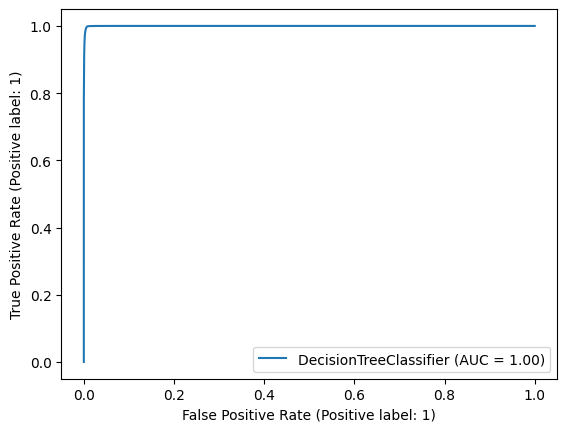

In [ ]:
# Plot ROC curve for Decision Tree

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(dt_clf, X_train_res, y_train_res, drop_intermediate=False)
plt.show()

**Random Forest**

In [ ]:
# Random Forest Model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=345)

param_grid = {
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  5.3min


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [ ]:
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,verbose=1)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [ ]:
# Prediction on Train Data

y_train_pred = rf_clf.predict(X_train_res)

print(confusion_matrix(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.5s


[[1283541    5628]
 [   5760 1283495]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289255

    accuracy                           1.00   2578424
   macro avg       1.00      1.00      1.00   2578424
weighted avg       1.00      1.00      1.00   2578424



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.7s


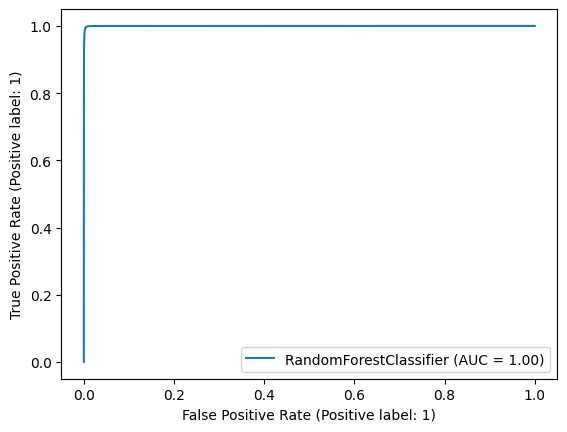

In [ ]:
# ROC curve for Random Forest on train set

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(rf_clf, X_train_res, y_train_res)
plt.show()

### **Model Evaluation**

**Predicting on test set**

In [ ]:
y_test_pred = rf_clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


In [ ]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[551689   1885]
 [   431   1714]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.80      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.90      0.80    555719
weighted avg       1.00      1.00      1.00    555719



**Testing model on original data without oversampling**

In [ ]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.54      0.90      0.68      7506

    accuracy                           1.00   1296675
   macro avg       0.77      0.95      0.84   1296675
weighted avg       1.00      1.00      1.00   1296675

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.80      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.90      0.80    555719
weighted avg       1.00      1.00      1.00    555719



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s


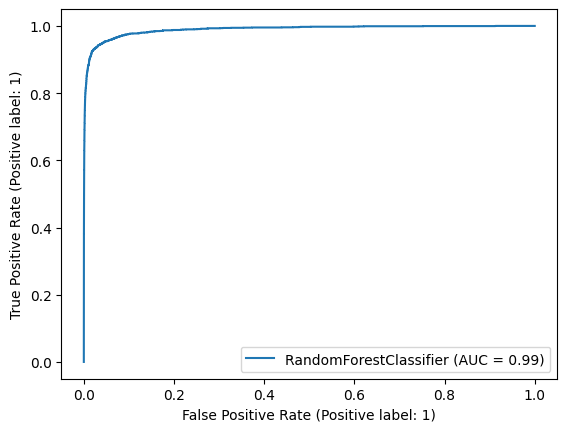

In [ ]:
# ROC curve for Random Forest on test set

RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()

In [ ]:
# Subset of train data sets

train_subset_df = Train_df[['trans_date_trans_time','amt','trans_num','is_fraud']]
train_subset_df.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [ ]:
train_subset_df.shape

(1296675, 4)

In [ ]:
# Creating dataframe of y_train_pred

train_pred_df = pd.DataFrame(y_train_pred, columns = ['fraud_prediction'])
train_pred_df.head()

,fraud_prediction
0,0
1,0
2,0
3,0
4,0


In [ ]:
train_pred_df.shape

(1296675, 1)

In [ ]:
# Merge the two dataframes

train_final_df = pd.concat([train_subset_df, train_pred_df],axis=1)
train_final_df.head()

,trans_date_trans_time,amt,trans_num,is_fraud,fraud_prediction
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [ ]:
train_final_df.shape

(1296675, 5)

In [ ]:
train_final_df.groupby('is_fraud')['is_fraud'].count()

,is_fraud
is_fraud,
0,1289169
1,7506


In [ ]:
train_final_df.groupby('fraud_prediction')['fraud_prediction'].count()

,fraud_prediction
fraud_prediction,
0,1284318
1,12357


In [ ]:
# Subset of test data sets

test_subset_df = Test_df[['trans_date_trans_time','amt','trans_num','is_fraud']]
test_subset_df.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [ ]:
test_subset_df.shape

(555719, 4)

In [ ]:
# Creating dataframe of y_test_pred

test_pred_df = pd.DataFrame(y_test_pred, columns = ['fraud_prediction'])
test_pred_df.head()

,fraud_prediction
0,0
1,0
2,0
3,0
4,0


In [ ]:
test_pred_df.shape

(555719, 1)

In [ ]:
# Merge the two dataframes

test_final_df = pd.concat([test_subset_df, test_pred_df],axis=1)
test_final_df.head()

,trans_date_trans_time,amt,trans_num,is_fraud,fraud_prediction
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [ ]:
test_final_df.shape

(555719, 5)

In [ ]:
test_final_df.groupby('is_fraud')['is_fraud'].count()

,is_fraud
is_fraud,
0,553574
1,2145


In [ ]:
test_final_df.groupby('fraud_prediction')['fraud_prediction'].count()

,fraud_prediction
fraud_prediction,
0,552120
1,3599


In [ ]:
final_df = pd.concat([train_final_df, test_final_df],axis=0)
final_df.head()

,trans_date_trans_time,amt,trans_num,is_fraud,fraud_prediction
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [ ]:
final_df.shape

(1852394, 5)

### **Cost Benefit Analysis**

In [ ]:
# Creating month and year columns

final_df['month'] = pd.DatetimeIndex(final_df['trans_date_trans_time']).month
final_df['year'] = pd.DatetimeIndex(final_df['trans_date_trans_time']).year
final_df.head()

,trans_date_trans_time,amt,trans_num,is_fraud,fraud_prediction,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [ ]:
group_df = final_df.groupby(["year","month"])

In [ ]:
# Number of transactions per month

group_df.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [ ]:
# Average number of transactions per month

avg_no_tran_per_month = final_df.trans_num.count()/24
avg_no_tran_per_month

77183.08333333333

In [ ]:
# Average number of fraudulent transactions per month

avg_frd_tran_per_month = final_df[final_df['is_fraud']==1].trans_num.count()/24
avg_frd_tran_per_month

402.125

In [ ]:
# Average amount per fraudulent transaction

avg_amt_per_frd_trans = final_df[final_df['is_fraud']==1].amt.mean()
avg_amt_per_frd_trans

530.661412288882

In [ ]:
# Average number of transactions per month detected as fraudulent by the model

TF = final_df[final_df['fraud_prediction']==1].trans_num.count()/24
TF

664.8333333333334

In [ ]:
# Average number of transactions per month that are fraudulent but not detected by the model

FN = final_df.loc[(final_df.fraud_prediction==0) & (final_df.is_fraud==1)].trans_num.count()/24
FN

50.333333333333336

In [ ]:
# Cost incurred per month before the model was deployed

Cost_incurred_before = avg_amt_per_frd_trans * avg_frd_tran_per_month
Cost_incurred_before

213392.2204166667

In [ ]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model

1.5 * TF

997.25

In [ ]:
# Cost incurred due to these fraudulent transactions left undetected by the model

avg_amt_per_frd_trans * FN

26709.95775187373

In [ ]:
# The cost incurred per month after the model is built and deployed

Cost_incurred_after = (1.5 * TF) + (avg_amt_per_frd_trans * FN)
Cost_incurred_after

27707.20775187373

In [ ]:
# Final savings

Final_savings = Cost_incurred_before - Cost_incurred_after
Final_savings

185685.01266479297